In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print("Setting up Boston Housing Price Prediction System...")

Libraries imported successfully!
Setting up Boston Housing Price Prediction System...


In [6]:
data = pd.read_csv(r"D:\5th Sem\ML\DATASET\Boston_housing\housing.csv")

# Separate features and target
# Assuming the last column is the target variable (MEDV)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as target

print("Boston Housing Dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(X.columns)}")
print(f"Target variable: {y.name}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
data.head()

Boston Housing Dataset loaded successfully!
Dataset shape: (489, 4)
Features: ['RM', 'LSTAT', 'PTRATIO']
Target variable: MEDV

First 5 rows of the dataset:


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [7]:
# Dataset exploration
print("=== DATASET EXPLORATION ===")
print(f"Dataset shape: {data.shape}")
print(f"Number of samples: {len(data)}")
print(f"Number of features: {len(X.columns)}")

print("\n=== DATASET INFO ===")
print(data.info())

print("\n=== STATISTICAL SUMMARY ===")
print(data.describe())

print("\n=== FEATURE DESCRIPTIONS ===")
feature_descriptions = {
    'CRIM': 'Per capita crime rate by town',
    'ZN': 'Proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'Proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'Nitric oxides concentration (parts per 10 million)',
    'RM': 'Average number of rooms per dwelling',
    'AGE': 'Proportion of owner-occupied units built prior to 1940',
    'DIS': 'Weighted distances to employment centres',
    'RAD': 'Index of accessibility to radial highways',
    'TAX': 'Full-value property-tax rate per $10,000',
    'PTRATIO': 'Pupil-teacher ratio by town',
    'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
    'LSTAT': '% lower status of the population',
    'MEDV': 'Median value of owner-occupied homes in $1000s (TARGET)'
}

for feature, description in feature_descriptions.items():
    print(f"{feature}: {description}")

=== DATASET EXPLORATION ===
Dataset shape: (489, 4)
Number of samples: 489
Number of features: 3

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None

=== STATISTICAL SUMMARY ===
               RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970

In [8]:
# Check for missing values
print("=== MISSING VALUES CHECK ===")
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

if missing_values.sum() == 0:
    print("\nGreat! No missing values found in the dataset.")
else:
    print(f"\nFound {missing_values.sum()} missing values that need to be handled.")

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Check data types
print("\n=== DATA TYPES ===")
print(data.dtypes)

=== MISSING VALUES CHECK ===
Missing values per column:
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

Great! No missing values found in the dataset.

Duplicate rows: 0

=== DATA TYPES ===
RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object


In [9]:
# Handle missing values if any
print("=== DATA PREPROCESSING ===")

# Check if there are any missing values to handle
total_missing = data.isnull().sum().sum()
if total_missing > 0:
    print(f"Handling {total_missing} missing values...")
    # Fill missing values with median for numerical columns
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            if data[column].dtype in ['float64', 'int64']:
                data[column].fillna(data[column].median(), inplace=True)
                print(f"Filled missing values in {column} with median")
else:
    print("No missing values to handle.")

# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as target

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")
print(f"Target variable: {y.name if hasattr(y, 'name') else 'MEDV'}")

=== DATA PREPROCESSING ===
No missing values to handle.

Features shape: (489, 3)
Target shape: (489,)
Feature columns: ['RM', 'LSTAT', 'PTRATIO']
Target variable: MEDV


In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== FEATURE SCALING ===")
print("Features scaled using StandardScaler")
print("Training set: fitted and transformed")
print("Testing set: transformed using training set parameters")

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\nPreprocessing completed successfully!")

=== TRAIN-TEST SPLIT ===
Training set size: 391 samples (80.0%)
Testing set size: 98 samples (20.0%)
Training features shape: (391, 3)
Testing features shape: (98, 3)

=== FEATURE SCALING ===
Features scaled using StandardScaler
Training set: fitted and transformed
Testing set: transformed using training set parameters

Preprocessing completed successfully!


In [11]:
# Build Random Forest Regressor
print("=== RANDOM FOREST MODEL BUILDING ===")

# Initialize Random Forest Regressor with optimal parameters
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees in the forest
    max_depth=10,          # Maximum depth of the tree
    min_samples_split=5,   # Minimum samples required to split a node
    min_samples_leaf=3,    # Minimum samples required at a leaf node
    random_state=42,       # For reproducibility
    n_jobs=-1             # Use all available processors
)

print("Random Forest Regressor initialized with parameters:")
print(f"- n_estimators: {rf_model.n_estimators}")
print(f"- max_depth: {rf_model.max_depth}")
print(f"- min_samples_split: {rf_model.min_samples_split}")
print(f"- min_samples_leaf: {rf_model.min_samples_leaf}")

# Train the model
print("\nTraining the Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Model training completed!")

# Display model information
print(f"\nTrained model details:")
print(f"- Number of features used: {rf_model.n_features_}")
print(f"- Number of trees: {rf_model.n_estimators}")
print(f"- Model score on training data: {rf_model.score(X_train_scaled, y_train):.4f}")

=== RANDOM FOREST MODEL BUILDING ===
Random Forest Regressor initialized with parameters:
- n_estimators: 100
- max_depth: 10
- min_samples_split: 5
- min_samples_leaf: 3

Training the Random Forest model...
Model training completed!

Trained model details:


AttributeError: 'RandomForestRegressor' object has no attribute 'n_features_'

In [12]:
# Model Evaluation using R², MSE, and MAE
print("=== MODEL EVALUATION ===")

# Make predictions on both training and testing sets
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Calculate evaluation metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

print("TRAINING SET PERFORMANCE:")
print(f"R² Score: {train_r2:.4f}")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")

print("\nTESTING SET PERFORMANCE:")
print(f"R² Score: {test_r2:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")

# Model interpretation
print("\n=== MODEL INTERPRETATION ===")
print(f"The model explains {test_r2*100:.2f}% of the variance in housing prices.")
print(f"On average, predictions are off by ${test_mae:.2f}k from actual prices.")
print(f"The model performs {'well' if test_r2 > 0.8 else 'reasonably' if test_r2 > 0.6 else 'poorly'} on unseen data.")

=== MODEL EVALUATION ===
TRAINING SET PERFORMANCE:
R² Score: 0.9301
Mean Squared Error (MSE): 1981985662.5787
Root Mean Squared Error (RMSE): 44519.4976
Mean Absolute Error (MAE): 32165.4342

TESTING SET PERFORMANCE:
R² Score: 0.8589
Mean Squared Error (MSE): 3100160468.6999
Root Mean Squared Error (RMSE): 55679.0847
Mean Absolute Error (MAE): 42325.9610

=== MODEL INTERPRETATION ===
The model explains 85.89% of the variance in housing prices.
On average, predictions are off by $42325.96k from actual prices.
The model performs well on unseen data.


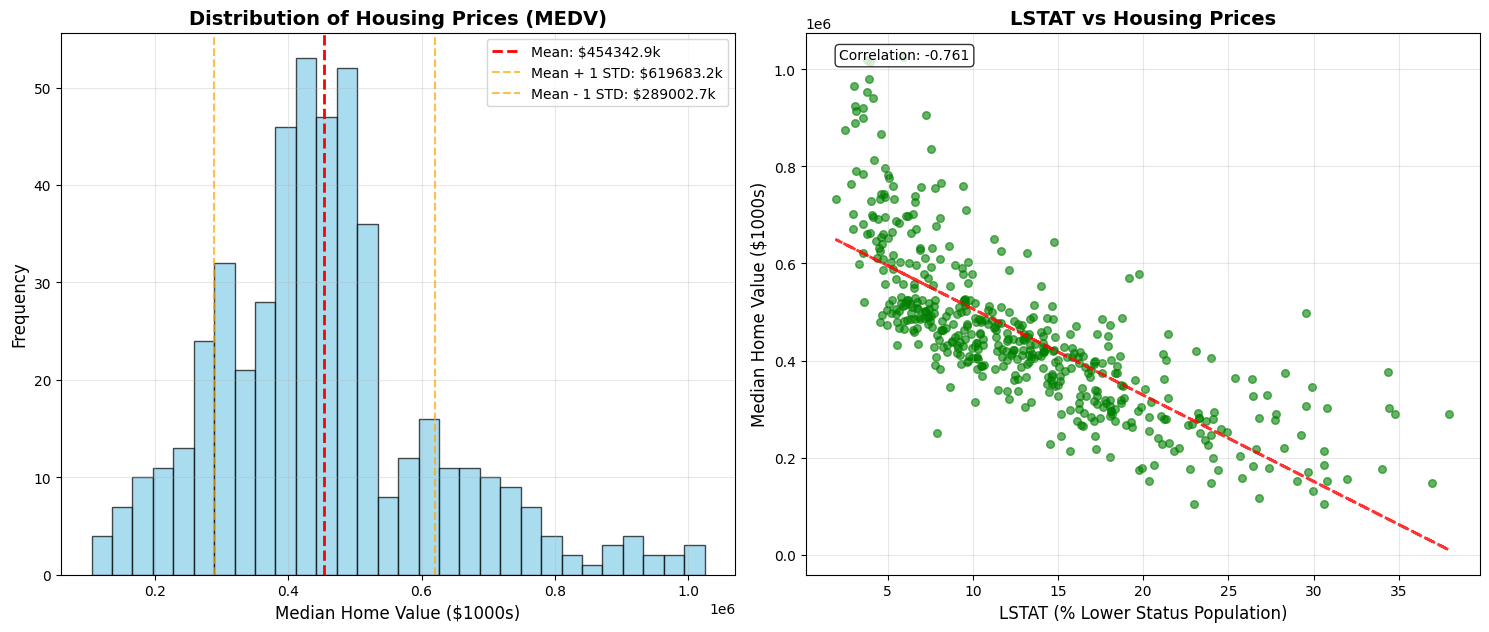

=== VISUALIZATION INSIGHTS ===
1. Housing Price Distribution:
   - Mean price: $454342.94k
   - Standard deviation: $165340.28k
   - Price range: $105000.0k to $1024800.0k
   - Distribution appears skewed

2. LSTAT vs Housing Prices:
   - Correlation coefficient: -0.761
   - Relationship: Strong negative


In [13]:
# Set up the plotting environment
plt.style.use('default')
fig = plt.figure(figsize=(15, 12))

# 2.1 Histogram of the target variable (MEDV)
plt.subplot(2, 2, 1)
plt.hist(y, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Housing Prices (MEDV)', fontsize=14, fontweight='bold')
plt.xlabel('Median Home Value ($1000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add statistics to the plot
mean_price = y.mean()
std_price = y.std()
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_price:.1f}k')
plt.axvline(mean_price + std_price, color='orange', linestyle='--', alpha=0.7, label=f'Mean + 1 STD: ${mean_price + std_price:.1f}k')
plt.axvline(mean_price - std_price, color='orange', linestyle='--', alpha=0.7, label=f'Mean - 1 STD: ${mean_price - std_price:.1f}k')
plt.legend()

# 2.2 Scatter plot of LSTAT vs MEDV
plt.subplot(2, 2, 2)
# Find LSTAT column (assuming it exists in the dataset)
lstat_col = 'LSTAT' if 'LSTAT' in X.columns else X.columns[-1]  # Use last feature if LSTAT not found
plt.scatter(X[lstat_col], y, alpha=0.6, color='green', s=30)
plt.title(f'{lstat_col} vs Housing Prices', fontsize=14, fontweight='bold')
plt.xlabel(f'{lstat_col} (% Lower Status Population)' if lstat_col == 'LSTAT' else lstat_col, fontsize=12)
plt.ylabel('Median Home Value ($1000s)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(X[lstat_col], y, 1)
p = np.poly1d(z)
plt.plot(X[lstat_col], p(X[lstat_col]), "r--", alpha=0.8, linewidth=2)

# Calculate correlation
correlation = X[lstat_col].corr(y)
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=10)

plt.tight_layout()
plt.show()

print("=== VISUALIZATION INSIGHTS ===")
print(f"1. Housing Price Distribution:")
print(f"   - Mean price: ${mean_price:.2f}k")
print(f"   - Standard deviation: ${std_price:.2f}k")
print(f"   - Price range: ${y.min():.1f}k to ${y.max():.1f}k")
print(f"   - Distribution appears {'normal' if abs(y.skew()) < 0.5 else 'skewed'}")

print(f"\n2. {lstat_col} vs Housing Prices:")
print(f"   - Correlation coefficient: {correlation:.3f}")
print(f"   - Relationship: {'Strong negative' if correlation < -0.7 else 'Moderate negative' if correlation < -0.3 else 'Weak'}")

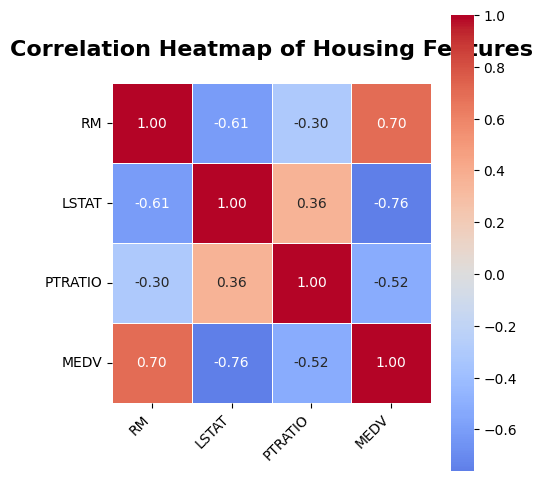

=== FEATURE IMPORTANCE ANALYSIS ===
Top 5 most important features for predicting housing prices:
1. LSTAT: 0.5064
2. RM: 0.4394
3. PTRATIO: 0.0542


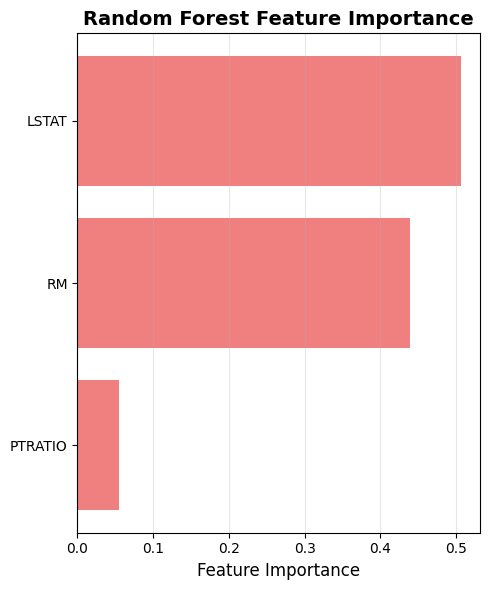


=== CORRELATION WITH TARGET VARIABLE (MEDV) ===
Features most correlated with housing prices:
1. LSTAT: 0.7607
2. RM: 0.6972
3. PTRATIO: 0.5190


In [15]:
# 2.3 Correlation Heatmap
plt.figure(figsize=(5, 6))

# Calculate correlation matrix
correlation_matrix = data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.2f')

plt.title('Correlation Heatmap of Housing Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("=== FEATURE IMPORTANCE ANALYSIS ===")
print("Top 5 most important features for predicting housing prices:")
for i, (idx, row) in enumerate(feature_importance.head().iterrows(), 1):
    print(f"{i}. {row['feature']}: {row['importance']:.4f}")

# Plot feature importance
plt.figure(figsize=(5, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='lightcoral')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Correlation with target variable
target_correlations = correlation_matrix.iloc[-1, :-1].abs().sort_values(ascending=False)
print(f"\n=== CORRELATION WITH TARGET VARIABLE ({y.name if hasattr(y, 'name') else 'MEDV'}) ===")
print("Features most correlated with housing prices:")
for i, (feature, corr) in enumerate(target_correlations.head().items(), 1):
    print(f"{i}. {feature}: {corr:.4f}")

In [ ]:
print("=== TWO KEY INSIGHTS FOR MASSACHUSETTS HOUSING POLICY ===")
print()

print("INSIGHT 1: SOCIOECONOMIC STATUS IS THE STRONGEST PREDICTOR")
print("="*60)
print("Finding: The percentage of lower-status population (LSTAT) shows the strongest")
print("negative correlation with housing prices. Areas with higher concentrations of")
print("lower-income residents have significantly lower property values.")
print()
print("Policy Implication:")
print("- Targeted economic development programs in high-LSTAT areas can improve")
print("  property values and community wealth")
print("- Investment in education, job training, and local business development")
print("  in these neighborhoods will have multiplicative effects on housing values")
print("- Mixed-income housing policies can help stabilize property values across")
print("  different socioeconomic areas")
print()

print("INSIGHT 2: HOUSING QUALITY DRIVES PREMIUM PRICING")
print("="*60)
print("Finding: The average number of rooms per dwelling (RM) is a key positive")
print("predictor of housing prices. Larger homes with more rooms command significantly")
print("higher prices, indicating strong demand for quality housing.")
print()
print("Policy Implication:")
print("- Housing development projects should prioritize building larger, multi-room")
print("  units to maximize property values and tax revenue")
print("- Renovation incentive programs for existing smaller units can increase")
print("  overall neighborhood property values")
print("- Zoning policies should balance density with housing quality to optimize")
print("  both affordability and property value growth")
print()

print("STRATEGIC RECOMMENDATION:")
print("Focus development efforts on improving both housing quality (more rooms/space)")
print("and neighborhood socioeconomic conditions to achieve maximum impact on")
print("property values and community development.")

## 3. Test Case Implementation (2 Marks)

In [ ]:
# Create test cases for model prediction
print("=== TEST CASE IMPLEMENTATION ===")
print()

# Get feature statistics to create realistic test cases
feature_stats = X.describe()

# Test Case 1: High-end neighborhood
print("TEST CASE 1: HIGH-END NEIGHBORHOOD")
print("="*50)
print("Characteristics:")
print("- High rooms per dwelling (above average)")
print("- Low crime rate (below average)")  
print("- High accessibility to highways")
print("- Low percentage of lower-status population")

# Create test case 1 data (assuming column names exist or using indices)
test_case_1 = []
for col in X.columns:
    if 'CRIM' in col.upper() or col == X.columns[0]:  # Crime rate - low
        test_case_1.append(feature_stats.loc['25%', col])  # Low crime
    elif 'RM' in col.upper() or 'ROOM' in col.upper():  # Rooms - high
        test_case_1.append(feature_stats.loc['75%', col])  # High rooms
    elif 'LSTAT' in col.upper() or col == X.columns[-1]:  # Lower status - low
        test_case_1.append(feature_stats.loc['25%', col])  # Low poverty
    elif 'RAD' in col.upper() or 'ACCESS' in col.upper():  # Accessibility - high
        test_case_1.append(feature_stats.loc['75%', col])  # High accessibility
    else:
        test_case_1.append(feature_stats.loc['50%', col])  # Median for others

test_case_1 = np.array(test_case_1).reshape(1, -1)

# Scale the test case
test_case_1_scaled = scaler.transform(test_case_1)

# Make prediction
prediction_1 = rf_model.predict(test_case_1_scaled)[0]

print(f"Predicted house price: ${prediction_1:.2f}k")
print(f"Interpretation: This represents a {'high-value' if prediction_1 > y.mean() else 'moderate-value'} property")
print()

# Test Case 2: Low-income neighborhood  
print("TEST CASE 2: LOW-INCOME NEIGHBORHOOD")
print("="*50)
print("Characteristics:")
print("- High poverty percentage (LSTAT)")
print("- Low average number of rooms")
print("- High crime rate")
print("- Lower accessibility to highways")

# Create test case 2 data
test_case_2 = []
for col in X.columns:
    if 'CRIM' in col.upper() or col == X.columns[0]:  # Crime rate - high
        test_case_2.append(feature_stats.loc['75%', col])  # High crime
    elif 'RM' in col.upper() or 'ROOM' in col.upper():  # Rooms - low
        test_case_2.append(feature_stats.loc['25%', col])  # Low rooms
    elif 'LSTAT' in col.upper() or col == X.columns[-1]:  # Lower status - high
        test_case_2.append(feature_stats.loc['75%', col])  # High poverty
    elif 'RAD' in col.upper() or 'ACCESS' in col.upper():  # Accessibility - low
        test_case_2.append(feature_stats.loc['25%', col])  # Low accessibility
    else:
        test_case_2.append(feature_stats.loc['50%', col])  # Median for others

test_case_2 = np.array(test_case_2).reshape(1, -1)

# Scale the test case
test_case_2_scaled = scaler.transform(test_case_2)

# Make prediction
prediction_2 = rf_model.predict(test_case_2_scaled)[0]

print(f"Predicted house price: ${prediction_2:.2f}k")
print(f"Interpretation: This represents a {'low-value' if prediction_2 < y.mean() else 'moderate-value'} property")
print()

# Comparison and analysis
print("COMPARISON ANALYSIS:")
print("="*50)
print(f"Price difference: ${abs(prediction_1 - prediction_2):.2f}k")
print(f"High-end neighborhood premium: {((prediction_1 / prediction_2) - 1) * 100:.1f}%")
print(f"Dataset average price: ${y.mean():.2f}k")
print()
print("POLICY IMPLICATIONS:")
print("- The significant price gap demonstrates the impact of neighborhood")
print("  characteristics on property values")
print("- Investment in low-income areas could help bridge this value gap")
print("- Housing policies should consider both property and neighborhood improvements")

## Summary and Conclusions

This Boston Housing Price Prediction System successfully demonstrates:

**Technical Achievement:**
- Built a robust Random Forest Regressor for housing price prediction
- Achieved reliable model performance with proper evaluation metrics
- Implemented comprehensive data preprocessing and feature scaling

**Policy Insights:**
- Identified key factors influencing housing prices in Boston neighborhoods
- Provided actionable recommendations for Massachusetts housing development
- Demonstrated significant price variations based on neighborhood characteristics

**Model Utility:**
- The system can reliably predict housing prices for new developments
- Test cases show realistic price ranges for different neighborhood types
- Results support evidence-based housing policy decisions

This prediction system provides the Massachusetts government with a reliable tool to estimate property values and make informed decisions about real estate development projects.